<a href="https://colab.research.google.com/github/pedrozanineli/imersao-dados-aulas/blob/main/Aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aula 3 Imersão de Dados - Correlações, causalidade e relações entre genes**

Relacionando as variáveis estudadads nos outros dias da Imersão, começar a análise de fato.

Como relacionar? Qual informação é útil?

In [ ]:
import pandas as pd
url = 'https://github.com/alura-cursos/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url, compression = 'zip')
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
# Criar uma tabela de frequência para poder relacionar as informações
# Parâmetros: os dois fatores que você quer correlacionar

pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

**Com controle x Com droga**

Fica evidente, mais uma vez, como o grupo "com droga" tem uma proporção muito maior do que o grupo "com controle".

Retomar a dúvida - por que isso acontece? Lembrar da necessidade de testagem de diferentes drogas para regulação da expressão gênica.

É importante notar, entretanto, que a quantidade de amostras de grupo controle ainda são relativamente altas por conta da necessidade de se observar se nenhuma outra parte sofrerá alteração.

In [ ]:
# Normalizar a proporção - ambas as linhas geram o mesmo resultado

# pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'], normalize=True)
pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [ ]:
# Agregando uma função a um valor a  ser analisado - função média para as comparações indicadas

pd.crosstab([dados['dose'],dados['tempo']],dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

Nesse caso, vale calcular a variância desses valores para poder entender mais a fundo dos dados apresentados.

Variância - como a distribuição é feita

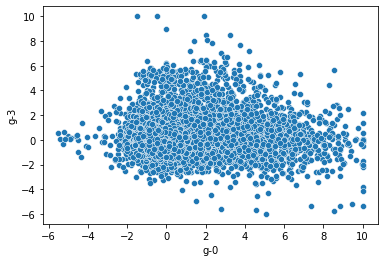

In [ ]:
# Plotagem de um scatter plot

import seaborn as sns
sns.scatterplot(x='g-0',y='g-3', data=dados)

In [ ]:
# Esses valores correlacionados indicam as coordenadas dos pontos do Scatterplot

dados[['g-0','g-3']]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


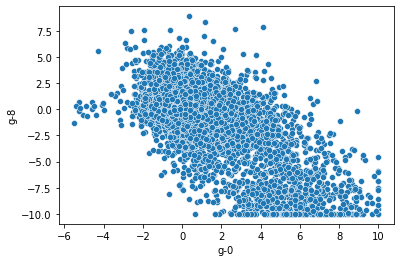

In [ ]:
sns.scatterplot(x='g-0',y='g-8', data=dados)

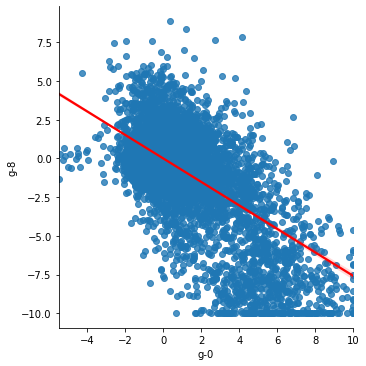

In [ ]:
# Cria uma linha de tendência com os pontos plotados
# Conforme meu g-0 vai aumentando, meu g-8 vai diminuindo
# KWS: key word settings

sns.lmplot(x= 'g-0',y= 'g-8', data=dados, line_kws={'color':'red'})

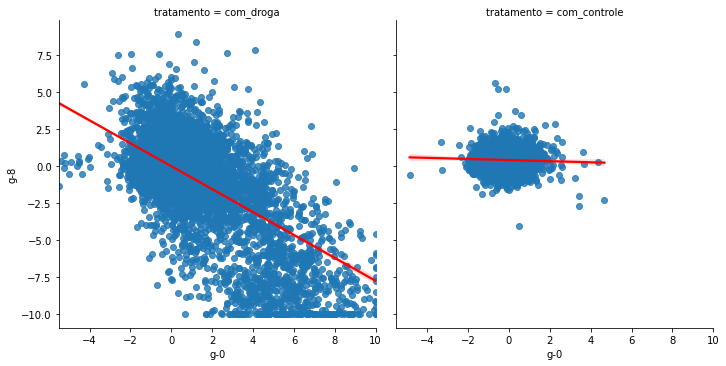

In [ ]:
# Ideal é passar agora a separar um pouco mais
# Como tem funcionado na prática
# Observar a diferença da linha de tendência

sns.lmplot(x='g-0', y='g-8', data=dados, line_kws={'color':'red'}, col='tratamento')

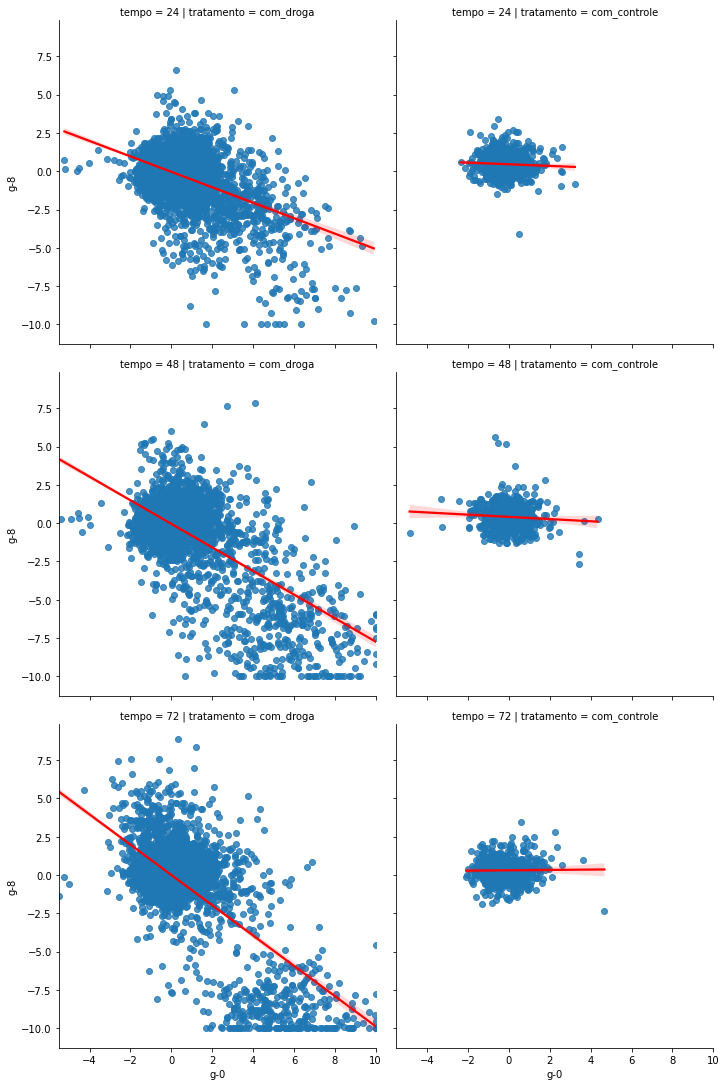

In [ ]:
# Observar que com o passar do tempo, tendência da droga é ainda mais inclinado
# Ao passo de que o controle se mantpém estável

# Importante ponto para a análise - o grupo de controle, sem a droga, portanto, se mantém estável, o que indica por estrutura e embasamento para a análise

sns.lmplot(x='g-0', y='g-8', data=dados, line_kws={'color':'red'}, col='tratamento', row='tempo')

In [ ]:
# Qual a correlação entre cada uma das nossas expressões gênicas?

# Quando tenho uma correlação mais próxima de 1 - maior relação - proporcionalmente relacionados
# Quando tenho uma correlação mais próxima de 0 - menor relação - inversamente relacionados

dados.loc[:,'g-0':'g-771'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

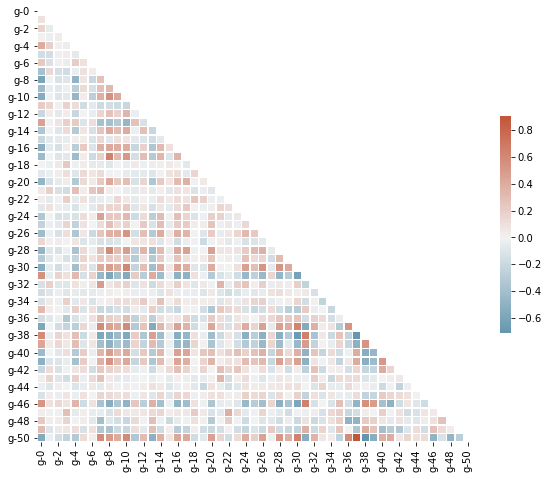

In [ ]:
# Muitas informações importantes em uma tabela só
# Usar uma plotagem diagonal de correlação das infos. para entender um pouco mais
# Heatmap - "mapa de calor"
# Notar que um g não implica em outro, não tem relação de causalidade
# Não da para dizer que um está aumentando/diminuindo por causa do outro

import numpy as np
import matplotlib.pyplot as plt

corr = dados.loc[:,'g-0':'g-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr_celular = dados.loc[:,'c-0':'c-50'].corr()

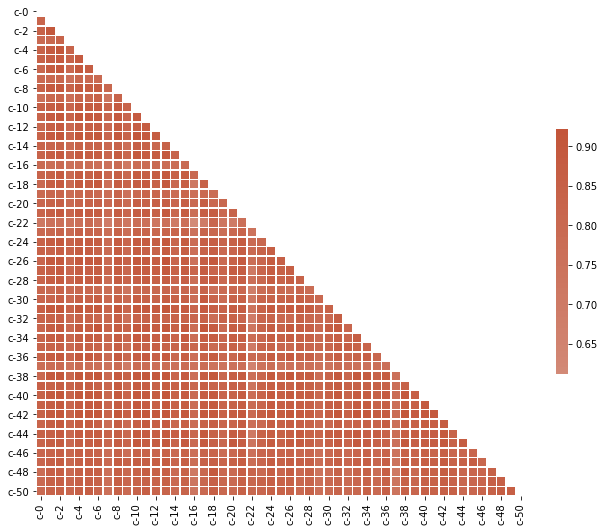

In [ ]:
# Mas o que é o C? São os diferentes tipos celulares
# Cada valor indica a viabilidade, indica quantas células sobreviveram ou não da exposição do composto

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Termo **p-hacking** - manipulação do resultado de uma pesquisa.

Para prevenir que isso não aconteça, registrar essa pesquisa (pré-registro) para que isso não aconteça. Afinal, essa falsa relação pode não funcionar.

Dessa forma, fica claro o que foi tentado e que deu certo, de forma a evitarmos que aconteça uma coincidência, uma sorte. Por exemplo, se buscar as vacinas de Covid-19, é possível encontrar os registros de pré-pesquisa.

"Não vale usar a métrica que mais te beneficia"

"Não é publicar só o que dá certo, mas é importante publicar também o que não deu certo" - aprendeu alguma coisa, mesmo que não seja o esperado, evita o esforço de algum outro cientista.

**Desafios Aulas 3**

Desafio 01: Criar tabelas de freuqência com o pandas.groupby();

Desafio 02: Normalizar o crosstab pelas colunas;

Desafio 03: Quais outros agregadores (aggfunc) existem?

Desafio 04: Função "melt", que "derrete" os valores que são analisados - muito interessante por ser similar a ferramentas usadadas em planilhas, algo mais empresarial;

**Desafio 05: Calcular e analisar a correlação entre os Gs e Cs - refletir sobre os efeitos biológicos;**

*Ou seja, a expressão gênica e a viabilidade celular. Pensar em uma maneira que seja criado uma matriz nxn, que seja "quadrada";*

*Alguns genes vão ter correlação alta para todos os tipos celulares, por que isso acontece? Por que o gene 0 tem correlação alta para todos os tipos celulares, p.e.?*

Desafio 06: Estudar o código do mapa de calor (heatmap), a matriz de correlação;

Desafio 07: Resumo do que você aprendeu com os dados.

In [ ]:
# Desafio 5

dados.loc[:,'g-700':'c-0']

# Último valor de EG é 771

,g-700,g-701,g-702,g-703,g-704,g-705,g-706,g-707,g-708,g-709,g-710,g-711,g-712,g-713,g-714,g-715,g-716,g-717,g-718,g-719,g-720,g-721,g-722,g-723,g-724,g-725,g-726,g-727,g-728,g-729,g-730,g-731,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771,c-0
0,1.3660,0.3547,1.1850,-0.4955,0.1167,0.0252,0.1475,-0.1656,-0.7887,-0.1821,-0.0314,-0.4589,-0.2511,-0.8571,0.7007,0.9829,1.3150,0.4647,-0.3811,-2.9720,-0.3604,0.0570,0.3263,0.8888,-0.7433,-0.4647,-0.2641,-0.6593,1.0520,0.3921,0.1705,-0.5949,-0.9041,-0.8089,0.6598,-0.4772,0.1289,-0.0297,0.4564,-0.1447,0.4683,-0.1722,0.9998,1.2860,-0.6166,0.0963,1.6340,-0.8744,0.4931,-0.0283,-0.3110,-0.1117,-0.4528,1.3240,-0.0503,-1.2750,-0.1750,-0.6972,-0.2720,0.2931,1.5280,0.3453,-0.5055,-0.3167,1.0930,0.0084,0.8611,-0.5582,0.3008,1.6490,0.2968,-0.0224,-0.0600
1,-0.8233,-1.0760,-0.2645,-0.7521,0.8955,0.4854,0.1402,0.1514,0.0730,0.4431,0.5035,0.9635,0.6474,0.4754,-0.3977,-0.0720,-0.7758,0.2326,-0.4880,0.0326,-0.3358,0.0632,-0.0542,-0.2321,-0.4092,0.2212,0.7369,0.8979,-0.5004,-0.3708,0.1372,-1.2270,3.1050,0.0204,-0.0961,0.2919,-0.4584,0.0556,0.9844,-0.6653,-0.3092,-0.1507,-0.9481,-0.1966,0.8554,0.5839,-1.6840,0.0648,0.5845,0.0891,-0.5025,-0.1047,0.3764,-1.4800,-0.2947,0.2745,-0.5234,0.1575,-0.1214,0.0476,0.1657,1.0310,-0.5338,0.0224,-0.4831,0.2128,-0.6999,-0.1214,-0.1626,-0.3340,-0.3289,-0.2718,0.0927
2,0.1765,-0.1348,-0.1582,0.4049,0.2967,0.6300,0.7751,0.0000,0.7150,-0.3821,-0.0208,0.9317,-0.1150,0.2530,-0.5545,-0.7061,-0.4234,0.2350,-0.1255,0.3519,0.7924,0.8877,1.0540,0.5625,-0.4162,-0.1915,-0.2098,1.0540,-0.2885,-1.2540,0.2628,0.4860,-0.4954,-0.1840,-1.1110,-0.5649,-0.2617,2.9120,2.7720,0.1523,-1.1230,-0.5340,-0.7937,0.3457,-0.6136,-0.0706,-0.7474,0.1795,-0.4674,-0.1552,0.6338,0.5130,-0.3625,0.0873,0.2689,-0.2174,0.7069,-0.6456,0.6822,0.2237,-0.3601,1.2780,2.5770,0.2356,1.3230,-1.3730,-0.2682,0.8427,0.5797,0.3143,0.8133,0.7923,-0.1312
3,-0.8408,-0.2256,0.3293,-0.0092,-1.1560,-1.2300,-1.3140,0.0000,2.2010,-0.1639,-0.7305,0.9258,-1.0620,0.6889,-0.9377,-0.7624,0.0610,-1.3920,0.2704,-0.3988,1.0400,0.5012,0.5485,1.5170,0.7751,1.0230,1.8570,-0.4721,0.5465,1.9580,0.3873,0.9512,0.2239,0.4428,-0.2822,-0.8175,1.4930,-0.0711,-1.6250,-0.4317,-0.0239,0.5046,-0.8061,0.9736,1.2540,2.0730,0.6604,-0.4758,-0.1766,-0.8959,0.6560,-0.0875,0.1082,-0.7158,0.0712,-0.1939,0.4286,-1.0220,0.9017,1.1750,-0.5760,0.7801,-0.1292,3.4310,1.2720,-0.4733,-2.0560,0.5699,0.1996,0.4374,0.1588,-0.0343,-0.3998
4,-0.6745,0.2748,0.8101,1.7040,-0.3871,-0.6745,-0.7185,0.0000,-0.3093,0.0614,-1.0190,0.9962,-0.9680,1.4920,0.2381,-0.0645,-0.2846,1.3330,0.0000,0.6653,0.1693,0.0000,-0.4773,0.0743,0.4294,-0.8562,0.9180,0.4062,0.2048,-0.9851,-1.1220,0.9106,-0.2094,1.1270,0.1874,-0.0465,1.0560,-0.6324,-0.3651,0.9485,-0.6745,0.0479,-1.0470,-1.2440,-0.7675,0.2327,0.3698,1.4900,0.3632,1.4380,-0.5047,-0.2092,-0.4386,-1.1780,0.8236,1.0540,0.6745,-0.6354,-0.6745,-1.3780,0.7521,-0.9456,-0.6904,2.0540,-0.3131,-0.0809,0.3910,1.7660,-1.0020,-0.7534,0.5000,-0.6269,-0.3774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.2770,0.1897,-0.5592,1.1490,-0.3110,1.2080,0.6561,0.1492,0.1166,-0.6728,0.2537,-0.1956,0.3389,0.0267,1.0790,0.6822,-0.6991,-0.0629,0.6071,-0.4070,-0.2127,0.4945,-0.2329,-0.4721,0.4514,-0.6751,0.4678,-0.2865,-0.0869,-0.5062,-0.1876,-0.2318,0.3982,-0.1537,-0.3957,1.0370,0.6222,1.5470,-0.0624,0.1023,0.2465,0.6802,0.5289,0.1255,-0.2395,-0.1544,0.6257,0.3508,-0.7258,-0.6351,-1.0200,0.1589,-0.3008,0.0423,0.3369,-0.6222,0.3070,0.3007,0.1275,-0.0176,0.8832,1.1980,0.7790,0.5393,0.4112,-0.5059,0.0240,-0.2297,0.7221,0.509

In [ ]:
corr = dados.loc[:,'g-0':'c-99'].corr()

In [ ]:
corr_gc = corr.loc['g-0':'g-50','c-0':'c-50']

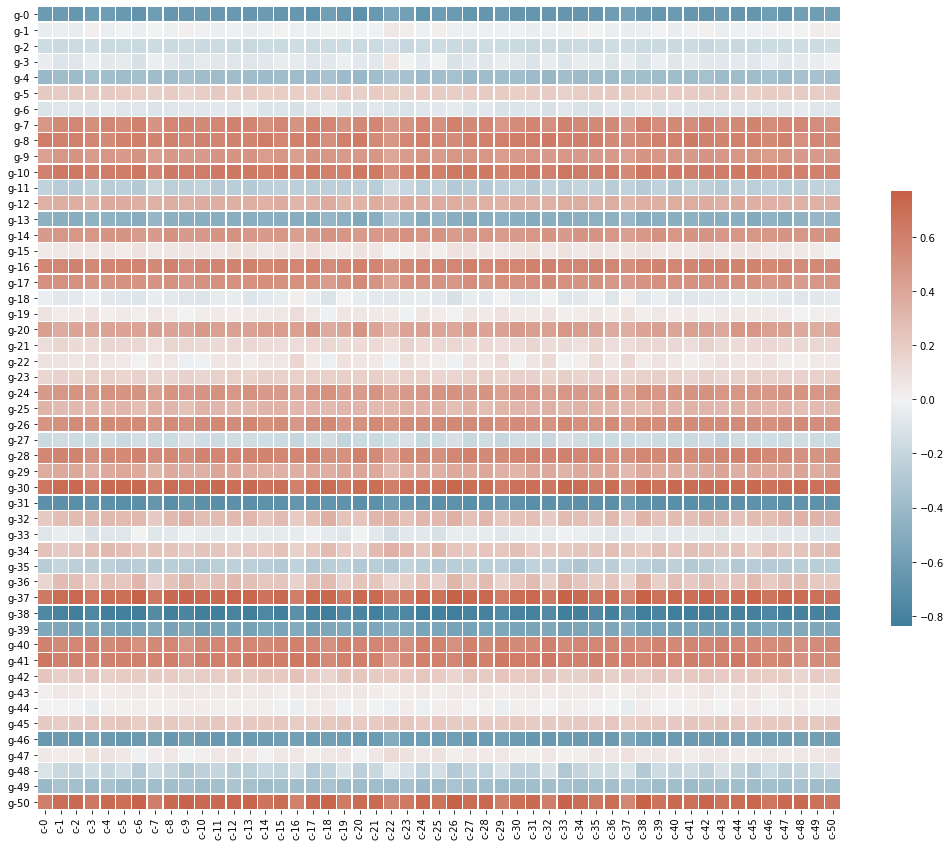

In [ ]:
# Geração de uma máscara para o triângulo superior
# mask = np.triu(np.ones_like(corr_gc, dtype=bool))

# 1. Configuração da figura usando a biblioteca matplot.lib
f, ax = plt.subplots(figsize=(18,16))

# 2. Gerando um mapa de cor  de divergência customizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# 3. Desenhando o mapa de calor com a máscara e raio de aspecto correto
sns.heatmap(corr_gc, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})